<div style='font-size:14pt' font-weight='bold'>Introduction to Tokenizing and Embedding </div>
Part 1. Tokenizing<br><br>
Tokenizing turns text to sequences of numbers. The number is the value of the corresponding word key. 
Thie code of this notebook is a summary of <a href='https://www.coursera.org/learn/natural-language-processing-tensorflow'>Natural Language Processing in Tensorflow</a>.

In [ ]:
# Open this notebook on google colab or kaggle so tha you can use tensorflow 2.0
# ! pip install tensorflow==2.0

# If you are working on a different environment uder tensorflow 1.x, execute the follwoing afer importin
# tf.enable_eager_execution()

In [9]:
# install relevant libraries
import os
import csv
import json
import zipfile
import shutil
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer # Tokenizer gnerate the dictionary of words encoding 
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(tf.__version__)

2.0.0


In [ ]:
# Store sentences into a list
# ML handles tokens/numbers represents the words in sentences, not the word itself.
# We have to convert the words into tokens/nmbers 
sentences = [
    'i love my dog.',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'  
]

In [ ]:
sentences

['i love my dog.',
 'I, love my cat',
 'You love my dog!',
 'Do you think my dog is amazing?']

In [ ]:
# Create a instance of tokenizer object
# num_words parameter set the number of words to keep
# If the words in the daaset is higher than this number Tokenizer will pick the top 100
tokenizer = Tokenizer(num_words=100)

# .fit_on_texts on tokenizer takes in the data and encodes it. This step is called tokenize.
tokenizer.fit_on_texts(sentences)   

# Grab .word_index property of tokenizer
# This retunrns a dictionary with key being the word and value being the encoded token 
word_index = tokenizer.word_index

# Turn the list of sentences into a list of sequence of numbers
# Sentences fed into can be different from the one used in .fit_on_texts
sequences = tokenizer.texts_to_sequences(sentences)


print('word_index: ', word_index)
print('sequences: ', sequences)

word_index:  {'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
sequences:  [[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [ ]:
# test on a different text
test_data = [
    'I really love my dog',
    'My dog loves my manatee'
]

In [ ]:
test_seq = tokenizer.texts_to_sequences(test_data)

# 'really' 'loves' and 'manatee' are dropped as they are not in the word index
print('test sequences: ', test_seq)

test sequences:  [[4, 2, 1, 3], [1, 3, 1]]


<hr>

<div style='font-size:14pt' font-weight='bold'>OOV(Out Of Vocabulary) token</div><br>
oov_token replaces unseen words in a sentence with 'OOV'

In [ ]:
# Store sentences into a list
sentences = [
    'i love my dog.',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'  
]

# Create a instance of tokenizer object with <OOV> token
tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>') 

# .fit_on_texts on tokenizer takes in the data and encodes it. This step is called tokenize
tokenizer.fit_on_texts(sentences)

# Grab .word_index property of tokenizer
# This retunrns a dictionary with key being the word and value being the encoded token 
word_index = tokenizer.word_index


# Turn the list of sentences into a list of sequence of numbers
# Sentences fed into can be different from the one used in .fit_on_texts
# This step is called encoding
sequences = tokenizer.texts_to_sequences(sentences)


# test on a different text
test_data = [
    'I really love my dog',
    'My dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)

# <OOV> or 1 is assigned to 'really' 'loves' and 'manatee' as they are not in the word index
print('word_index: ', word_index)
print('test sequences: ', test_seq)

word_index:  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
test sequences:  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


<hr>

<div style='font-size:14pt' font-weight='bold'>Padding</div><br>
To feed data into neural networks the data should be uniform in size. pad_sequences allows you to use sentences of different lengths by padding or truncattion.

In [ ]:
# import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Store sentences into a list
sentences = [
    'i love my dog.',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'  
]

# Create a instance of tokenizer object with oov_token token parameter. The word used here should be unique
tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>') 

# .fit_on_texts on tokenizer takes in the data and encodes it. This step is called tokenize
tokenizer.fit_on_texts(sentences)

# Grab .word_index property of tokenizer
# This retunrns a dictionary with key being the word and value being the encoded token 
word_index = tokenizer.word_index

# Turn the list of sentences into a list of sequence of numbers
# Sentences fed into can be different from the one used in .fit_on_texts
# This step is called encoding
sequences = tokenizer.texts_to_sequences(sentences)

# Pass the sequences to padsequences object 
# You can see each sentence has been padded out (They have same length)
padded = pad_sequences(sequences)

print('word_index: ', word_index, '\n')
print('sequences: ', sequences ,'\n')
print('Padded sequences (begining): \n', padded)

word_index:  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11} 

sequences:  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]] 

Padded sequences (begining): 
 [[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [ ]:
# Padding after the sentences
padded = pad_sequences(sequences, padding='post')
print('Padded sequences from the end: \n', padded)

Padded sequences from the end: 
 [[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


In [ ]:
# Set the max length of sentences
# The long sentences lose information from the begining 
padded = pad_sequences(sequences, padding='post', maxlen=5)
print('Padded from the end and truncated from begining of sequences: \n', padded)

Padded from the end and truncated from begining of sequences: 
 [[ 5  3  2  4  0]
 [ 5  3  2  7  0]
 [ 6  3  2  4  0]
 [ 9  2  4 10 11]]


In [ ]:
# Truncate from the end  
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=5)
print('Padded and truncated from the end of sequences: \n', padded)

Padded and truncated from the end of sequences: 
 [[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


<hr>

<div style='font-size:14pt' font-weight='bold'>Real-world case 1</div><br>
The first example is tokenizing the BBC news and removing common stopwords. We can download the BBC news articles dataset from 
<a href='http://mlg.ucd.ie/datasets/bbc.html'>here</a>.
<br>
List of stop words are avialble <a href='https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js'>here</a>.

In [ ]:
# download the dataset
!wget --no-check-certificate \
    http://mlg.ucd.ie/files/datasets/bbc.zip \
    -O /tmp/bbc-text.zip

--2020-01-03 07:10:50--  http://mlg.ucd.ie/files/datasets/bbc.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 884338 (864K) [application/zip]
Saving to: ‘/tmp/bbc-text.zip’

/tmp/bbc-text.zip   100%[===================>] 863.61K  --.-KB/s    in 0.1s    

2020-01-03 07:10:50 (8.33 MB/s) - ‘/tmp/bbc-text.zip’ saved [884338/884338]



In [ ]:
# os.listdir('/tmp/')

In [ ]:
# Unzip　the data
local_zip = '/tmp/bbc-text.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
# It turns out that the original data format is not a standard file type
# os.listdir('/tmp/')

In [ ]:
# We can download the csv format from here provided by Laurence Moroney
# Please check his NLP course https://www.coursera.org/learn/natural-language-processing-tensorflow/home/welcome

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-01-03 07:19:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2020-01-03 07:19:45 (157 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [ ]:
# Store the stopwords into a list
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [ ]:
file_path = '/tmp/bbc-text.csv'
df = pd.read_csv(file_path)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<hr>

<div style='font-size:12pt' font-weight='bold'>Remove stop words
</div><br>

In [ ]:
# Create empty list
sentences = []
labels = []

# Read the csv file 
# This part can also be done using pandas
with open("/tmp/bbc-text.csv", 'r') as csvfile: 
    reader = csv.reader(csvfile, delimiter=',') 
    next(reader)
    for row in reader:
      labels.append(row[0])
      sentence = row[1]

      # remove stop words
      for word in stopwords:
        token = " " + word + " "
        sentence = sentence.replace(token, " ")
        sentence = sentence.replace("  ", " ")
      sentences.append(sentence)

print(len(sentences))
print(sentences[0])

2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

In [ ]:
# call tokenizer object
tokenizer = Tokenizer(oov_token='<OVV>')

# tokenize
tokenizer.fit_on_texts(sentences)

# Grab .word_index property of tokenizer
word_index = tokenizer.word_index

# print the length of word_index
print(len(word_index))

29714


In [ ]:
# Encoding: Encode the sentences into sequence of numbers. 
sequences = tokenizer.texts_to_sequences(sentences)

# Call pad_sequences object
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape) 

[  96  176 1158 ...    0    0    0]
(2225, 2442)


In [ ]:
# Tokenize the labels

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)

# See the tokenized labels of the dataset 
print(label_seq)

# See the tokens of labels 
print(label_word_index)

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2],

<hr>

<div style='font-size:14pt' font-weight='bold'>Real world case 2</div><br>
We ues kaggle dataset "News Headlines Dataset For Sarcasm Detection"<br>


Each record consists of three attributes:
<ul>
<li>is_sarcastic: 1 if the record is sarcastic otherwise 0
<li>headline: the headline of the news article
<li>article_link: link to the original news article. Useful in collecting supplementary data
</ul>
references:<br>
<a href='https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection'>kaggle competition</a>

<hr>

We save the kaggle zip file which is available <a href='https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection'>here</a> (press download) to the google drive and thus want to mount on google drive from google colab. You can skip this steps if your are working on local environment or others.<br>
<br>
<a href='https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166'>Downloading Datasets into Google Drive via Google Colab</a>

In [ ]:
# Mount on google drive from google colab
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Store the root path
root_g_path = '/content/gdrive/My Drive/'

In [ ]:
# After donwloading the kaggle zip file and saving it the google drive check the directory where the file is saved 
data_path = os.path.join(root_g_path,'Coursera_NLP') 
os.listdir(data_path)

['tokenziser_NLP.ipynb',
 'news-headlines-dataset-for-sarcasm-detection.zip',
 'Sarcasm_Headlines_Dataset.json',
 'Sarcasm_Headlines_Dataset_v2.json']

In [ ]:
# Unzip　the data
local_zip = os.path.join(data_path,'news-headlines-dataset-for-sarcasm-detection.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(data_path)
zip_ref.close()

In [ ]:
os.listdir(data_path)

['tokenziser_NLP.ipynb',
 'news-headlines-dataset-for-sarcasm-detection.zip',
 'Sarcasm_Headlines_Dataset.json',
 'Sarcasm_Headlines_Dataset_v2.json']

In [ ]:
file_path = os.path.join(data_path,'Sarcasm_Headlines_Dataset_v2.json')

# Open the file and pass it json.load

# The common way to read json file:
# with open(file_path, 'r') as f:
#   datasource = json.load(f)

# In this case, Extra value error occurs
# The next code works
# See https://stackoverflow.com/questions/21058935/python-json-loads-shows-valueerror-extra-data
datasource = [json.loads(line) for line in open(file_path, 'r')]

In [ ]:
# The dataset has three set of lists
# Create three lists 
sentences = []
labels = []
urls = []

# Iterate through the datasource and grab each item into list
for item in datasource:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [ ]:
sentences[:10]

['thirtysomething scientists unveil doomsday clock of hair loss',
 'dem rep. totally nails why congress is falling short on gender, racial equality',
 'eat your veggies: 9 deliciously different recipes',
 'inclement weather prevents liar from getting to work',
 "mother comes pretty close to using word 'streaming' correctly",
 'my white inheritance',
 '5 ways to file your taxes with less stress',
 "richard branson's global-warming donation nearly as much as cost of failed balloon trips",
 'shadow government getting too large to meet in marriott conference room b',
 'lots of parents know this scenario']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Create a instance of tokenizer object
tokenizer = Tokenizer(oov_token='<OOV>') 

# Call .fit_on_texts to generate word index. This step is called tokenize
tokenizer.fit_on_texts(sentences)

# Grab .word_index property of tokenizer
# This retunrns a dictionary with key being the word and value being the encoded token 
word_index = tokenizer.word_index

# Turn the list of all sentences into a list of sequence of numbers. This step is called encoding
sequences = tokenizer.texts_to_sequences(sentences)

# Pass the sequences to pad_sequences object
# The sentences will be post-padded here
padded = pad_sequences(sequences,padding='post')


# Length of word_index
print(len(word_index), '\n')

# The first sentence
print(sentences[0], '\n')

# See the first padded matrix
print(padded[0], '\n')

# Each sentences is padded up to 152
# 152 is the longest sentence. We do not truncate here
print(padded.shape)

30885 

thirtysomething scientists unveil doomsday clock of hair loss 

[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0] 



<hr>

<div style='font-size:14pt' font-weight='bold'>Introduction to Tokenizing and Embedding </div>
Part 2. Embedding<br><br>
Embedding is a process of extracting sentiment from words. By embedding, the words are represented as vectors in a multi-dimensional space. In a sentiment classification problem, vectors of words are clustered to each sentiment.
We want to use IMBD data set which is one of the built-in data sets of TensorFlow Data Services. It has 50,000 movie reviews which are categorized as  either positive or negative.<br><br>
The original data was authored by Andrew Mass:  <a href='https://ai.stanford.edu/~amaas/data/sentiment/'>link to the site</a> 

In [ ]:
print(tf.__version__)

2.0.0


In [ ]:
from platform import python_version
print(python_version())

3.6.9


In [ ]:
# install tensorflow dataset if you are not using google colab
# ! pip install -q tensorflow-datasets

<hr>

<div style='font-size:12pt' font-weight='bold'>Load the data
</div><br>

In [ ]:
import tensorflow_datasets as tfds
imbd, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [4]:
type(imbd)

dict

In [ ]:
# Split the data into training and test
train_data, test_data = imbd['train'], imbd['test']

In [6]:
type(train_data)

tensorflow.python.data.ops.dataset_ops._OptionsDataset

In [ ]:
# Define the list containing sentences
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []


# Iterate over training data and extract the sentences and labels
# s and l are tensors. We need to call numpy method to extract the value
for s,l in train_data:
  training_sentences.append(str(s.numpy())) 
  training_labels.append(l.numpy())

# Iterate over test data  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  

# In training the labels are expected to be numpy arrays  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

<hr>

<div style='font-size:12pt' font-weight='bold'>Embedding</div><br>
Tokenized number of the words have no meaning in its relative distance in value. The number 1 and number 2 are close, but the words represented by 1 and 2 are arbitrary. Word embeddings is a way of representing tokenized words in a vector space i.e., 16-dimensional vector space, such that words with the same/similar meaning are clustered in the space. Machine learning algorithm learns the vector from the labeled training set. 

In [ ]:
# Tokenize the training sentences before learning embedding vectors

# Hyperparameters
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) # Create a instance
tokenizer.fit_on_texts(training_sentences) # fit the tokenizer on the data
word_index = tokenizer.word_index 
sequences = tokenizer.texts_to_sequences(training_sentences) # replaces the words with the token values
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type) # pad and truncate

# Do the same for testing sequences
# The words index are derived from the training set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [24]:
# A function o reverse the word index, used later
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b oh yeah jenna jameson did it again yeah baby this movie rocks it was one of the 1st movies i saw of her and i have to say i feel in love with her she was great in this move br br her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing br br i hope this comment helps and u can buy the movie the storyline is awesome is very unique and i'm sure u are going to like it jenna amazed us once more and no wonder the movie won so many
b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the

<hr>

<div style='font-size:12pt' font-weight='bold'>Define the model
</div><br>

In [ ]:
# Define a model
model = tf.keras.Sequential([
        #  Embedding layer outputs 2D array(max length of the sentence times embedding dimension)                     
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),  

        # Flatten the 2D array 
        tf.keras.layers.Flatten(),  
        tf.keras.layers.Dense(6,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')                     
])

# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Fit the model
# 100% accuracy in the training set and 83% accuracy in the validation set. There is a chance of overfitting.
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 7s 261us/sample - loss: 0.4953 - accuracy: 0.7371 - val_loss: 0.3475 - val_accuracy: 0.8476
Epoch 2/10
25000/25000 [==============================] - 5s 217us/sample - loss: 0.2392 - accuracy: 0.9080 - val_loss: 0.3715 - val_accuracy: 0.8372
Epoch 3/10
25000/25000 [==============================] - 5s 219us/sample - loss: 0.0936 - accuracy: 0.9767 - val_loss: 0.4485 - val_accuracy: 0.8224
Epoch 4/10
25000/25000 [==============================] - 5s 220us/sample - loss: 0.0225 - accuracy: 0.9970 - val_loss: 0.5313 - val_accuracy: 0.8222
Epoch 5/10
25000/25000 [==============================] - 5s 216us/sample - loss: 0.0051 - accuracy: 0.9997 - val_loss: 0.5922 - val_accuracy: 0.8248
Epoch 6/10
25000/25000 [==============================] - 5s 219us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6385 - val_accuracy: 0.8263
Epoch 7/10
25000/25000 [==========================

In [22]:
# Get the results of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


We can see tha there are 10,000 words in the corpus projected on to a 16-dimensional array. The training and testing are down. The followings are for visulazing the embedding vector.

In [ ]:
# Files for projecting embedding vectors to 3D space 

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Downlad the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

You can go to the <a href='https://projector.tensorflow.org/'>tensorflow Embedding projector</a> to visularize the 3D vector file (reducing 16 to 3 is by PCA). Press the load button and upload vecs.tsv and meta.tsv. Click the 'Sphereize data' and you can see the clustered words in sphere. Below is a screen shot.

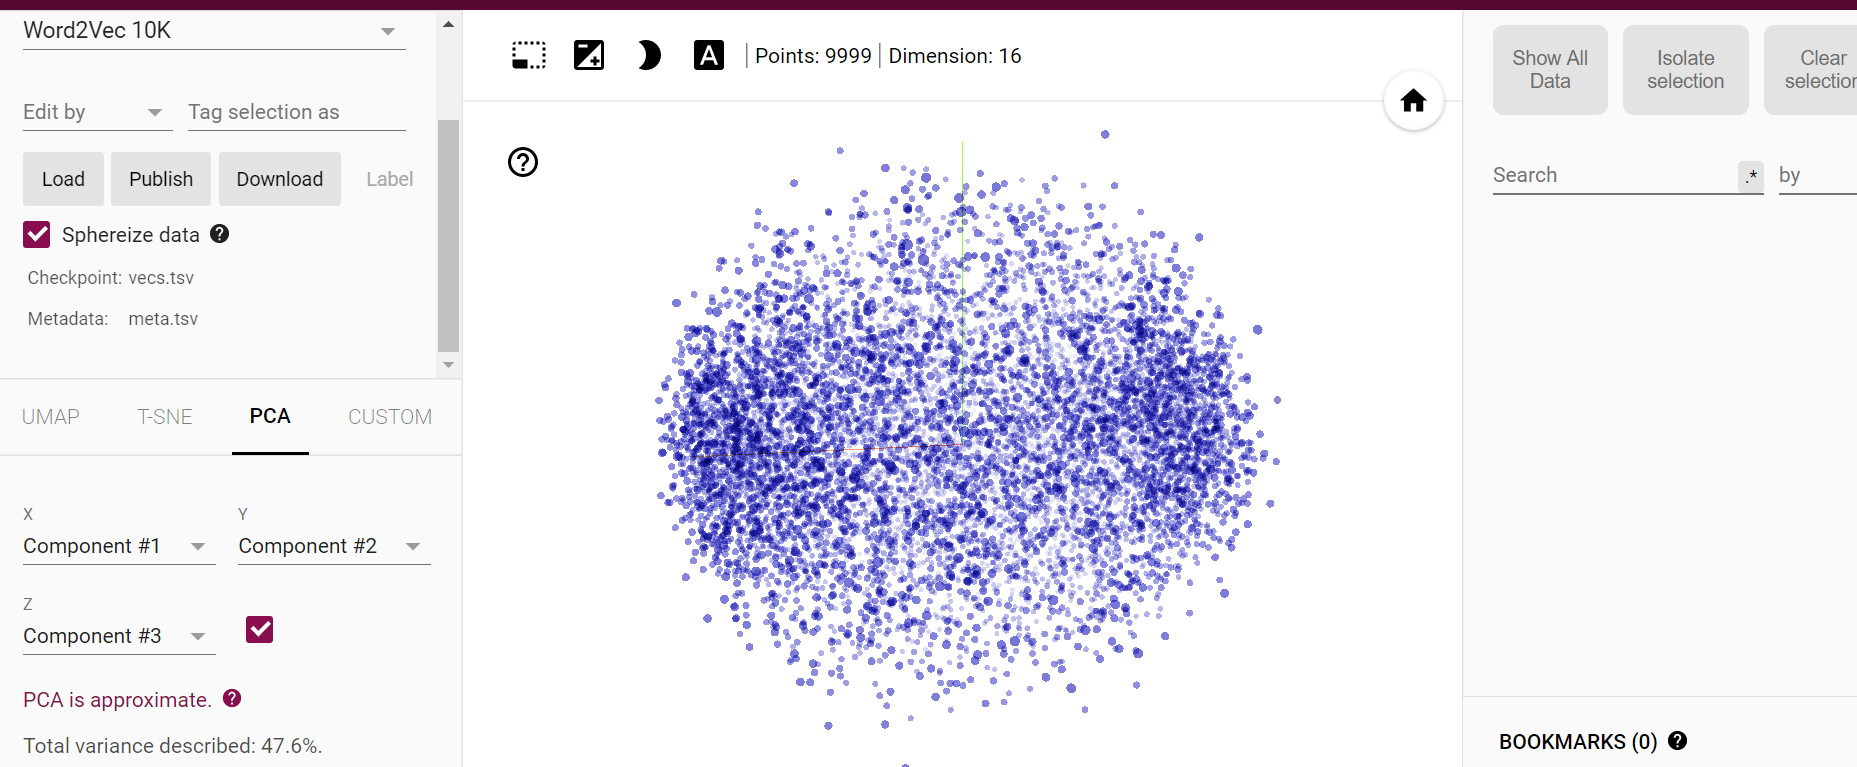

In [3]:
from IPython.display import Image
Image(filename='3D_visualize.png',width=1000) 

In [27]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [1430], [968], [4], [1537], [1537], [4738], [], [790], [2015], [11], [2922], [2191], [], [790], [2015], [11], [579], [], [11], [579], [], [4], [1783], [4], [4508], [11], [2922], [1277], [], [], [2015], [1005], [2922], [968], [579], [790], []]


<hr>

In [ ]:
# Alternative for the flatten layer
model = tf.keras.Sequential([
        #  Embedding layer outputs 2D array(max length of the sentence times embedding dimension)                     
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),  

        # This layer averages across the vector to flatten. This has a fewer parameters than flatten. 
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Flatten(),  
        tf.keras.layers.Dense(6,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')                     
])


# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Fit the model (Faster than flatten)
# Achieved 95.7% accuracy in the training set and 82% accuracy in the validation set
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 224us/sample - loss: 0.5435 - accuracy: 0.7620 - val_loss: 0.3784 - val_accuracy: 0.8442
Epoch 2/10
25000/25000 [==============================] - 5s 202us/sample - loss: 0.3281 - accuracy: 0.8635 - val_loss: 0.3303 - val_accuracy: 0.8588
Epoch 3/10
25000/25000 [==============================] - 5s 202us/sample - loss: 0.2673 - accuracy: 0.8908 - val_loss: 0.3351 - val_accuracy: 0.8552
Epoch 4/10
25000/25000 [==============================] - 5s 207us/sample - loss: 0.2321 - accuracy: 0.9110 - val_loss: 0.3470 - val_accuracy: 0.8519
Epoch 5/10
25000/25000 [==============================] - 5s 206us/sample - loss: 0.2061 - accuracy: 0.9216 - val_loss: 0.3760 - val_accuracy: 0.8438
Epoch 6/10
25000/25000 [==============================] - 5s 207us/sample - loss: 0.1850 - accuracy: 0.9332 - val_loss: 0.3984 - val_accuracy: 0.8403
Epoch 7/10
25000/25000 [==========================

<hr>